In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


**Importing the dataset**

In [3]:
df = pd.read_csv("Social_Network_Ads (1).csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
del df['User ID']
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})

**Splitting the dataset into the Training set and Test set**

In [5]:
x = df.drop(['Purchased','Gender'],axis=1)
y = df['Purchased']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

**Feature Scaling**

In [6]:
mx = MinMaxScaler()
mx.fit(X_train)
for i in ['Age','EstimatedSalary']:
  X_train[[i]] = mx.fit_transform(X_train[[i]])

mx.fit(X_test)
for i in ['Age','EstimatedSalary']:
  X_test[[i]] = mx.fit_transform(X_test[[i]])

**Fitting Decision Tree Classification to the Training set**

In [7]:
depth = []
score = [] 
for i in range(2,10):
  dt = DecisionTreeClassifier(max_depth=i)
  dt.fit(X_train,y_train)
  depth.append(i)
  score.append(np.mean(cross_val_score(dt,X_train,y_train)))
  print("depth :", i, "training score :", dt.score(X_train,y_train), "cross_val_score :", np.mean(cross_val_score(dt,X_train,y_train)))

depth : 2 training score : 0.90625 cross_val_score : 0.89375
depth : 3 training score : 0.9125 cross_val_score : 0.896875
depth : 4 training score : 0.925 cross_val_score : 0.9125
depth : 5 training score : 0.9375 cross_val_score : 0.884375
depth : 6 training score : 0.953125 cross_val_score : 0.8875
depth : 7 training score : 0.95625 cross_val_score : 0.865625
depth : 8 training score : 0.978125 cross_val_score : 0.875
depth : 9 training score : 0.990625 cross_val_score : 0.871875


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'score')

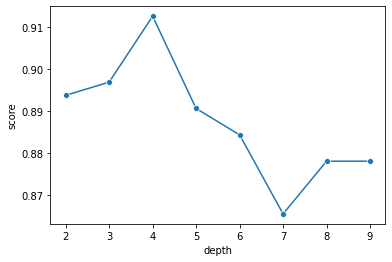

In [8]:
sns.lineplot(depth,score,marker='o')
plt.xlabel("depth")
plt.ylabel('score')

In [9]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train,y_train)
dt.score(X_train,y_train)

0.925

**Predicting the Test set results**

In [10]:
y_pred = dt.predict(X_test)
pd.DataFrame({'Actual':y_test,'predicted':y_pred})

,Actual,predicted
24,1,1
338,0,0
285,1,1
261,1,1
393,1,1
...,...,...
72,0,0
2,0,0
286,0,0
80,0,0


In [11]:
roc_auc_score(y_test,y_pred)

0.8696715583508037

**Making the Confusion Matrix**

In [12]:
confusion_matrix(y_test,y_pred)

array([[49,  4],
       [ 5, 22]])

**Visualising the Training set results**

Text(0, 0.5, 'EstimatedSalary')

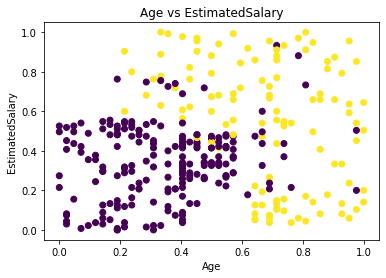

In [13]:
# Visualization of Training data
plt.scatter(X_train['Age'],X_train['EstimatedSalary'],c=y_train)
plt.title('Age vs EstimatedSalary')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')

**Visualising the Test set results**

Text(0, 0.5, 'EstimatedSalary')

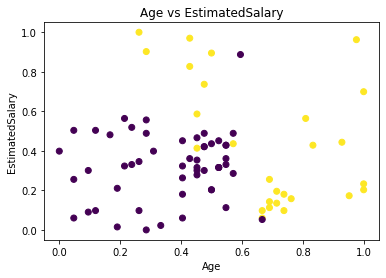

In [14]:
# Visualization of Testing data(Actual)
plt.scatter(X_test['Age'],X_test['EstimatedSalary'],c=y_test)
plt.title('Age vs EstimatedSalary')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')

Text(0, 0.5, 'EstimatedSalary')

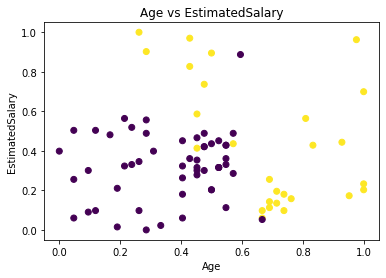

In [15]:
# Visualization of Testing data(Actual)
plt.scatter(X_test['Age'],X_test['EstimatedSalary'],c=y_test)
plt.title('Age vs EstimatedSalary')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')